#  Contact Matrices - with age group (separated)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import nafot
from tqdm import tqdm, tqdm_notebook
import pickle
plt.style.use('ggplot')

## Load raw matrix

In [2]:
#### Matrix A ####
gdf = nafot.gdf.copy()
matrix_A_adult = np.load('../../data/new_samples/matrix_raw/adult/adult_martrix_raw_all.npy')
matrix_A_children = np.load('../../data/new_samples/matrix_raw/children/children_martrix_raw_all.npy')

# Save to a dataframe
area = 'stat_area'
areas_ids = np.array(gdf.index.values)
matrix_A_df_adult = pd.DataFrame(matrix_A_adult, index=areas_ids, columns=areas_ids)
matrix_A_df_children = pd.DataFrame(matrix_A_children, index=areas_ids, columns=areas_ids)

## Statistical area level

### Population size - by stat area

#### Adult

Number of areas with population > 0: 1498 (out of 3070)

	Areas with population < 5 (>0): 244 areas, 499 users (0.34%)    (1254 areas remaining)
	Areas with population < 10 (>0): 333 areas, 1,095 users (0.74%)    (1165 areas remaining)
	Areas with population < 20 (>0): 456 areas, 2,911 users (1.96%)    (1042 areas remaining)
	Areas with population < 30 (>0): 565 areas, 5,550 users (3.74%)    (933 areas remaining)
	Areas with population < 50 (>0): 729 areas, 11,940 users (8.05%)    (769 areas remaining)


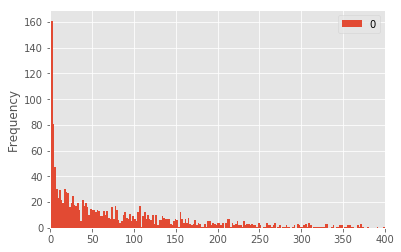

In [3]:
population_sizes_adult = matrix_A_df_adult.sum(1)[matrix_A_df_adult.sum(1) > 0]
print(f'Number of areas with population > 0: {population_sizes_adult.size} (out of {matrix_A_df_adult.index.size})\n')
for i in [5,10,20,30,50]:
    curr_pop = population_sizes_adult[(population_sizes_adult<i)&(population_sizes_adult>0)]
    print(f'\tAreas with population < {i} (>0): {curr_pop.size} areas, {int(curr_pop.sum()):,d} users ({curr_pop.sum()/(matrix_A_df_adult.sum(1).sum())*100:.2f}%)\
    ({population_sizes_adult.size - curr_pop.size} areas remaining)')

# Plot popoulation sizes
pd.DataFrame(population_sizes_adult).plot.hist(bins=1498)
plt.xlim([0,400])
plt.show()

#### Children

Number of areas with population > 0: 1115 (out of 3070)

	Areas with population < 5 (>0): 325 areas, 662 users (2.84%)    (790 areas remaining)
	Areas with population < 10 (>0): 485 areas, 1,735 users (7.44%)    (630 areas remaining)
	Areas with population < 20 (>0): 684 areas, 4,626 users (19.83%)    (431 areas remaining)
	Areas with population < 30 (>0): 831 areas, 8,171 users (35.03%)    (284 areas remaining)
	Areas with population < 50 (>0): 998 areas, 14,641 users (62.76%)    (117 areas remaining)


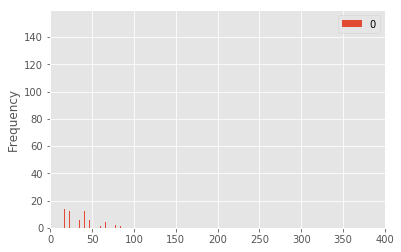

In [4]:
population_sizes_children = matrix_A_df_children.sum(1)[matrix_A_df_children.sum(1) > 0]
print(f'Number of areas with population > 0: {population_sizes_children.size} (out of {matrix_A_df_children.index.size})\n')
for i in [5,10,20,30,50]:
    curr_pop = population_sizes_children[(population_sizes_children<i)&(population_sizes_children>0)]
    print(f'\tAreas with population < {i} (>0): {curr_pop.size} areas, {int(curr_pop.sum()):,d} users ({curr_pop.sum()/(matrix_A_df_children.sum(1).sum())*100:.2f}%)\
    ({population_sizes_children.size - curr_pop.size} areas remaining)')

# Plot popoulation sizes
pd.DataFrame(population_sizes_children).plot.hist(bins=1115)
plt.xlim([0,400])
plt.show()

### Removing irrelevant areas

Irrelevant subdistricts

In [5]:
# Get the list of irrelevant stat ares (from Hasharon, Be'er Sheva and Hadera subdistricts)
subdist_stat_area_hierarchy = nafot.get_hierarchical_list('subdistrict')
irrelevant_areas = np.array([], dtype='int64')
for subdist in [32,41,62]:
    irrelevant_areas = np.append(irrelevant_areas, subdist_stat_area_hierarchy[subdist])
    
# Remove those areas from the raw matrix
matrix_A_df_adult.loc[irrelevant_areas] = 0
matrix_A_df_adult.loc[:,irrelevant_areas] = 0
matrix_A_df_children.loc[irrelevant_areas] = 0
matrix_A_df_children.loc[:,irrelevant_areas] = 0

#### Areas not in both matrices - not needed.

I'll deal with it in the network generation (as with the sparse areas)

In [6]:
# # Get areas in each matrix
# adult_areas = set(matrix_A_df_adult.index[matrix_A_df_adult.sum(1) > 0])
# children_areas = set(matrix_A_df_children.index[matrix_A_df_children.sum(1) > 0])

# # Get areas to remove


### Population size - by stat area - after removing irrelevant areas

#### Adult

Number of areas with population > 0: 1407 (out of 3070) ; population: 146,311 users

	Areas with population < 5: 222 areas, 515 users (0.35%)    (1185 areas remaining)
	Areas with population < 10: 287 areas, 1,004 users (0.69%)    (1120 areas remaining)
	Areas with population < 20: 399 areas, 2,740 users (1.87%)    (1008 areas remaining)
	Areas with population < 30: 498 areas, 5,244 users (3.58%)    (909 areas remaining)
	Areas with population < 50: 650 areas, 11,321 users (7.74%)    (757 areas remaining)


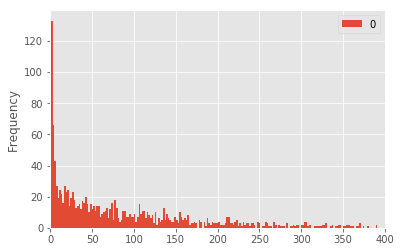

In [7]:
population_sizes_adult = matrix_A_df_adult.sum(1)[matrix_A_df_adult.sum(1) > 0]
print(f'Number of areas with population > 0: {population_sizes_adult.size} (out of {matrix_A_df_adult.index.size}) ; \
population: {int(population_sizes_adult.sum()):,d} users\n')
for i in [5,10,20,30,50]:
    curr_pop = population_sizes_adult[population_sizes_adult<i]
    print(f'\tAreas with population < {i}: {curr_pop.size} areas, {int(curr_pop.sum()):,d} users ({curr_pop.sum()/(matrix_A_df_adult.sum(1).sum())*100:.2f}%)\
    ({population_sizes_adult.size - curr_pop.size} areas remaining)')

# Plot popoulation sizes
pd.DataFrame(population_sizes_adult).plot.hist(bins=1498)
plt.xlim([0,400])
plt.show()

#### Children

Number of areas with population > 0: 1089 (out of 3070) ; population: 23,229 users

	Areas with population < 5: 327 areas, 737 users (3.17%)    (762 areas remaining)
	Areas with population < 10: 476 areas, 1,830 users (7.88%)    (613 areas remaining)
	Areas with population < 15: 578 areas, 3,135 users (13.50%)    (511 areas remaining)
	Areas with population < 20: 677 areas, 4,926 users (21.21%)    (412 areas remaining)
	Areas with population < 30: 811 areas, 8,267 users (35.59%)    (278 areas remaining)
	Areas with population < 50: 975 areas, 14,699 users (63.28%)    (114 areas remaining)


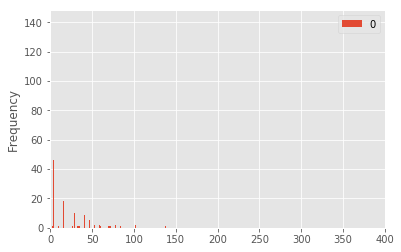

In [37]:
population_sizes_children = matrix_A_df_children.sum(1)[matrix_A_df_children.sum(1) > 0]
print(f'Number of areas with population > 0: {population_sizes_children.size} (out of {matrix_A_df_children.index.size}) ; \
population: {int(population_sizes_children.sum()):,d} users\n')
for i in [5,10,15,20,30,50]:
    curr_pop = population_sizes_children[population_sizes_children<i]
    print(f'\tAreas with population < {i}: {curr_pop.size} areas, {int(curr_pop.sum()):,d} users ({curr_pop.sum()/(matrix_A_df_children.sum(1).sum())*100:.2f}%)\
    ({population_sizes_children.size - curr_pop.size} areas remaining)')

# Plot popoulation sizes
pd.DataFrame(population_sizes_children).plot.hist(bins=1089)
plt.xlim([0,400])
plt.show()

### Calculate the contact matrix

#### Adult

In [9]:
contact_matrix_stat_area_df_adult = nafot.visits_to_contact_matrix(matrix_A_adult, 'stat_area')

# Save the final matrix
contact_matrix_stat_area_df_adult.to_csv('../data/matrix/contact_matrix_final_adult.csv')

Number of areas without population data (not home stat area): 772
Number of areas without population data (home stat area): 281


100%|██████████████████████████████████████████████████████████████████████████████| 2298/2298 [00:47<00:00, 48.10it/s]


#### Children

In [10]:
contact_matrix_stat_area_df_children = nafot.visits_to_contact_matrix(matrix_A_children, 'stat_area')

# Save the final matrix
contact_matrix_stat_area_df_children.to_csv('../data/matrix/contact_matrix_final_children.csv')

Number of areas without population data (not home stat area): 772
Number of areas without population data (home stat area): 166


100%|██████████████████████████████████████████████████████████████████████████████| 2298/2298 [00:46<00:00, 49.06it/s]


## Yeshuv level

### Aggregate by yeshuv

#### Adult

In [11]:
# Get relevant level codes and names
area_level = 'yeshuv'
hierarchical_list = nafot.get_hierarchical_list(area_level)

# Get codes column names in gdf
code_col_names = {'district': 'DistrictCode', 'subdistrict': 'SubDistrictCode', 'yeshuv': 'SEMEL_YISH'}

if area_level != 'stat_area':
    # If the level is not stat area, add the relevant level to the location data
    area_col = code_col_names[area_level] 

# Get a list of the area's ids
areas_ids = pd.unique(gdf[area_col])

# Remove NaN
areas_ids = np.array(areas_ids[~np.isnan(areas_ids)])

# Aggregate the columns
matrix_A_agg_cols_df_adult = pd.DataFrame(index=matrix_A_df_adult.index, columns=areas_ids)
for agg_area_id in tqdm(areas_ids, 'Columns'):
    matrix_A_agg_cols_df_adult[agg_area_id] = matrix_A_df_adult[hierarchical_list[agg_area_id]].sum(axis=1)
    
# Aggregate the rows
matrix_A_yeshuv_df_adult = pd.DataFrame(index=areas_ids, columns=areas_ids)
for agg_area_id in tqdm(areas_ids, 'Rows'):
    matrix_A_yeshuv_df_adult.loc[agg_area_id] = matrix_A_agg_cols_df_adult.loc[hierarchical_list[agg_area_id]].sum()

Rows: 100%|████████████████████████████████████████████████████████████████████████| 1235/1235 [00:59<00:00, 20.86it/s]


#### Children

In [12]:
# Get relevant level codes and names
area_level = 'yeshuv'
hierarchical_list = nafot.get_hierarchical_list(area_level)

# Get codes column names in gdf
code_col_names = {'district': 'DistrictCode', 'subdistrict': 'SubDistrictCode', 'yeshuv': 'SEMEL_YISH'}

if area_level != 'stat_area':
    # If the level is not stat area, add the relevant level to the location data
    area_col = code_col_names[area_level] 

# Get a list of the area's ids
areas_ids = pd.unique(gdf[area_col])

# Remove NaN
areas_ids = np.array(areas_ids[~np.isnan(areas_ids)])

# Aggregate the columns
matrix_A_agg_cols_df_children = pd.DataFrame(index=matrix_A_df_children.index, columns=areas_ids)
for agg_area_id in tqdm(areas_ids, 'Columns'):
    matrix_A_agg_cols_df_children[agg_area_id] = matrix_A_df_children[hierarchical_list[agg_area_id]].sum(axis=1)
    
# Aggregate the rows
matrix_A_yeshuv_df_children = pd.DataFrame(index=areas_ids, columns=areas_ids)
for agg_area_id in tqdm(areas_ids, 'Rows'):
    matrix_A_yeshuv_df_children.loc[agg_area_id] = matrix_A_agg_cols_df_children.loc[hierarchical_list[agg_area_id]].sum()

Rows: 100%|████████████████████████████████████████████████████████████████████████| 1235/1235 [01:57<00:00, 10.48it/s]


### Population size - by stat yeshuv

#### Adult

Number of areas with population > 0: 369 (out of 1235)

	Areas with population < 5: 57 areas, 132 users (0.09%)    (312 areas remaining)
	Areas with population < 10: 77 areas, 290 users (0.20%)    (292 areas remaining)
	Areas with population < 20: 125 areas, 1,021 users (0.70%)    (244 areas remaining)
	Areas with population < 30: 161 areas, 1,944 users (1.33%)    (208 areas remaining)
	Areas with population < 50: 211 areas, 3,871 users (2.65%)    (158 areas remaining)
	Areas with population < 100: 269 areas, 8,048 users (5.50%)    (100 areas remaining)


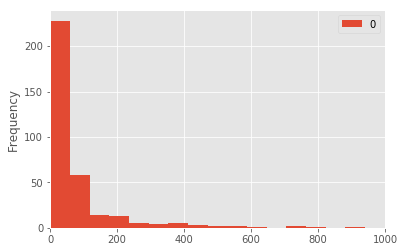

In [21]:
population_sizes_yeshuv_adult = matrix_A_yeshuv_df_adult.sum(1)[matrix_A_yeshuv_df_adult.sum(1) > 0]
print(f'Number of areas with population > 0: {population_sizes_yeshuv_adult.size} (out of {matrix_A_yeshuv_df_adult.index.size})\n')
for i in [5,10,20,30,50,100]:
    curr_pop = population_sizes_yeshuv_adult[population_sizes_yeshuv_adult<i]
    print(f'\tAreas with population < {i}: {curr_pop.size} areas, {int(curr_pop.sum()):,d} users ({curr_pop.sum()/(matrix_A_df_adult.sum(1).sum())*100:.2f}%)\
    ({population_sizes_yeshuv_adult.size - curr_pop.size} areas remaining)')

# Plot popoulation sizes
pd.DataFrame(population_sizes_yeshuv_adult).plot.hist(bins=432)
plt.xlim([0,1000])
plt.show()

#### Children

Number of areas with population > 0: 232 (out of 1235)

	Areas with population < 5: 144 areas, 308 users (1.33%)    (88 areas remaining)
	Areas with population < 10: 172 areas, 501 users (2.16%)    (60 areas remaining)
	Areas with population < 20: 179 areas, 601 users (2.59%)    (53 areas remaining)
	Areas with population < 30: 184 areas, 723 users (3.12%)    (48 areas remaining)
	Areas with population < 50: 189 areas, 921 users (3.97%)    (43 areas remaining)
	Areas with population < 100: 199 areas, 1,576 users (6.79%)    (33 areas remaining)


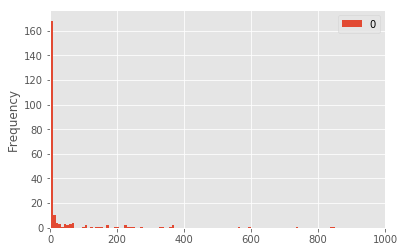

In [22]:
population_sizes_yeshuv_children = matrix_A_yeshuv_df_children.sum(1)[matrix_A_yeshuv_df_children.sum(1) > 0]
print(f'Number of areas with population > 0: {population_sizes_yeshuv_children.size} (out of {matrix_A_yeshuv_df_children.index.size})\n')
for i in [5,10,20,30,50,100]:
    curr_pop = population_sizes_yeshuv_children[population_sizes_yeshuv_children<i]
    print(f'\tAreas with population < {i}: {curr_pop.size} areas, {int(curr_pop.sum()):,d} users ({curr_pop.sum()/(matrix_A_df_children.sum(1).sum())*100:.2f}%)\
    ({population_sizes_yeshuv_children.size - curr_pop.size} areas remaining)')

# Plot popoulation sizes
pd.DataFrame(population_sizes_yeshuv_children).plot.hist(bins=432)
plt.xlim([0,1000])
plt.show()

### Calculate contact matrix

#### Adult

In [23]:
# Matrix A
visits_matrix_yeshuv_adult = matrix_A_yeshuv_df_adult.values

# Calculate contact matrix
contact_matrix_yeshuv_adult = nafot.visits_to_contact_matrix(visits_matrix_yeshuv_adult, 'yeshuv')

# Save the final matrix
contact_matrix_yeshuv_adult.to_csv('../data/matrix/contact_matrix_final_yeshuv_adult.csv')

Number of areas without population data (not home stat area): 530
Number of areas without population data (home stat area): 121


100%|████████████████████████████████████████████████████████████████████████████████| 705/705 [00:23<00:00, 29.67it/s]


#### Children

In [27]:
# Matrix A
visits_matrix_yeshuv_children = matrix_A_yeshuv_df_children.values

# Calculate contact matrix
contact_matrix_yeshuv_children = nafot.visits_to_contact_matrix(visits_matrix_yeshuv_children, 'yeshuv')

# Save the final matrix
contact_matrix_yeshuv_children.to_csv('../data/matrix/contact_matrix_final_yeshuv_children.csv')

Number of areas without population data (not home stat area): 530
Number of areas without population data (home stat area): 55


100%|████████████████████████████████████████████████████████████████████████████████| 705/705 [00:23<00:00, 29.72it/s]


## Subdistrict level

### Aggregate by subdist

#### Adult

In [31]:
# Get relevant level codes and names
area_level = 'subdistrict'
hierarchical_list = nafot.get_hierarchical_list(area_level)

# Get codes column names in gdf
code_col_names = {'district': 'DistrictCode', 'subdistrict': 'SubDistrictCode', 'yeshuv': 'SEMEL_YISH'}

if area_level != 'stat_area':
    # If the level is not stat area, add the relevant level to the location data
    area_col = code_col_names[area_level] 

# Get a list of the area's ids
areas_ids = pd.unique(gdf[area_col])

# Remove NaN
areas_ids = np.array(areas_ids[~np.isnan(areas_ids)])

# Aggregate the columns
matrix_A_agg_cols_df_adult = pd.DataFrame(index=matrix_A_df_adult.index, columns=areas_ids)
for agg_area_id in areas_ids:
    matrix_A_agg_cols_df_adult[agg_area_id] = matrix_A_df_adult[hierarchical_list[agg_area_id]].sum(axis=1)

# Aggregate the rows
matrix_A_subdist_df_adult = pd.DataFrame(index=areas_ids, columns=areas_ids)
for agg_area_id in areas_ids:
    matrix_A_subdist_df_adult.loc[agg_area_id] = matrix_A_agg_cols_df_adult.loc[hierarchical_list[agg_area_id]].sum()

#### Children

In [32]:
# Get relevant level codes and names
area_level = 'subdistrict'
hierarchical_list = nafot.get_hierarchical_list(area_level)

# Get codes column names in gdf
code_col_names = {'district': 'DistrictCode', 'subdistrict': 'SubDistrictCode', 'yeshuv': 'SEMEL_YISH'}

if area_level != 'stat_area':
    # If the level is not stat area, add the relevant level to the location data
    area_col = code_col_names[area_level] 

# Get a list of the area's ids
areas_ids = pd.unique(gdf[area_col])

# Remove NaN
areas_ids = np.array(areas_ids[~np.isnan(areas_ids)])

# Aggregate the columns
matrix_A_agg_cols_df_children = pd.DataFrame(index=matrix_A_df_children.index, columns=areas_ids)
for agg_area_id in areas_ids:
    matrix_A_agg_cols_df_children[agg_area_id] = matrix_A_df_children[hierarchical_list[agg_area_id]].sum(axis=1)

# Aggregate the rows
matrix_A_subdist_df_children = pd.DataFrame(index=areas_ids, columns=areas_ids)
for agg_area_id in areas_ids:
    matrix_A_subdist_df_children.loc[agg_area_id] = matrix_A_agg_cols_df_children.loc[hierarchical_list[agg_area_id]].sum()

### Population size - by subdistrict

In [33]:
# Population size
matrix_A_subdist_df_adult.sum(1).sort_values()

62.0        0.000000
21.0        0.000000
32.0        0.000000
41.0        0.000000
22.0        0.000000
23.0        0.000000
31.0        0.000000
24.0        0.000000
29.0        0.000000
77.0     4118.238517
44.0     5528.096892
61.0     8432.124908
43.0    14078.290882
11.0    19582.944040
42.0    37352.935298
51.0    57219.310383
dtype: float64

In [34]:
matrix_A_subdist_df_children.sum(1).sort_values()

62.0        0.000000
21.0        0.000000
32.0        0.000000
41.0        0.000000
22.0        0.000000
23.0        0.000000
31.0        0.000000
24.0        0.000000
29.0        0.000000
44.0      425.405572
61.0      823.369578
77.0      886.292933
11.0     1915.269429
43.0     2202.919361
42.0     5798.398250
51.0    11177.823880
dtype: float64

### Calculate contact matrix

#### Adult

In [35]:
# Matrix A
visits_matrix_subdist_adult = matrix_A_subdist_df_adult.values

# Calculate contact matrix
contact_matrix_subdist_adult = nafot.visits_to_contact_matrix(visits_matrix_subdist_adult, 'subdistrict')

# Save the final matrix
contact_matrix_subdist_adult.to_csv('../data/matrix/contact_matrix_final_subdist_adult.csv')

Number of areas without population data (not home stat area): 0
Number of areas without population data (home stat area): 0


100%|████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 5319.77it/s]


#### Children

In [36]:
# Matrix A
visits_matrix_subdist_children = matrix_A_subdist_df_children.values

# Calculate contact matrix
contact_matrix_subdist_children = nafot.visits_to_contact_matrix(visits_matrix_subdist_children, 'subdistrict')

# Save the final matrix
contact_matrix_subdist_children.to_csv('../data/matrix/contact_matrix_final_subdist_children.csv')

Number of areas without population data (not home stat area): 0
Number of areas without population data (home stat area): 0


100%|███████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 15495.00it/s]


## Sparse areas

#### Adult

In [38]:
# Get stat areas with less than 30 users
sparse_areas_adult = population_sizes_adult[population_sizes_adult < 30].index

# Get sparse yeshuvim
sparse_yeshuvim_adult = population_sizes_yeshuv_adult[population_sizes_yeshuv_adult < 30].index

# Get sparse stat areas' yesuv 
sparse_areas_yeshuv_adult = [gdf.loc[area]['SEMEL_YISH'] for area in sparse_areas_adult]

# Get sparse stat areas' subdistrict 
sparse_areas_subdist_adult = [gdf.loc[area]['SubDistrictCode'] for area in sparse_areas_adult]

# Check threshold for saprse areas for children

#### Children

In [40]:
# Get stat areas with less than 30 users
sparse_areas_children = population_sizes_children[population_sizes_children < 15].index ################ 15??????????

# Get sparse yeshuvim
sparse_yeshuvim_children = population_sizes_yeshuv_children[population_sizes_yeshuv_children < 30].index

# Get sparse stat areas' yesuv 
sparse_areas_yeshuv_children = [gdf.loc[area]['SEMEL_YISH'] for area in sparse_areas_children]

# Get sparse stat areas' subdistrict 
sparse_areas_subdist_children = [gdf.loc[area]['SubDistrictCode'] for area in sparse_areas_children]

### Use higher hirarchy instead of the sparse areas

#### Adults

In [42]:
# initialize a dictionary
sparse_area_dict_adult = {}

# Go over the sparse areas
for i, area in enumerate(sparse_areas_adult):
    # If the stat area's yeshuv is also sparse, use the subdistrict
    if sparse_areas_yeshuv_adult[i] in sparse_yeshuvim_adult:
        sparse_area_dict_adult[area] = ['subdistrict', sparse_areas_subdist_adult[i]]
    # If the stat area's yeshuv is not sparse, use it
    else:
        sparse_area_dict_adult[area] = ['yeshuv', sparse_areas_yeshuv_adult[i]]
        
# Saving the dict
with open('../data/sparse_areas_adult.pickle','wb') as pickle_out:
    pickle.dump(sparse_area_dict_adult, pickle_out)

# Loading the dict
# with open('../data/sparse_areas.pickle','rb') as pickle_in:
#     sparse_ares_dict = pickle.load(pickle_in)

#### Children

In [43]:
# initialize a dictionary
sparse_area_dict_children = {}

# Go over the sparse areas
for i, area in enumerate(sparse_areas_children):
    # If the stat area's yeshuv is also sparse, use the subdistrict
    if sparse_areas_yeshuv_children[i] in sparse_yeshuvim_children:
        sparse_area_dict_children[area] = ['subdistrict', sparse_areas_subdist_children[i]]
    # If the stat area's yeshuv is not sparse, use it
    else:
        sparse_area_dict_children[area] = ['yeshuv', sparse_areas_yeshuv_children[i]]
        
# Saving the dict
with open('../data/sparse_areas_children.pickle','wb') as pickle_out:
    pickle.dump(sparse_area_dict_children, pickle_out)

# Loading the dict
# with open('../data/sparse_areas.pickle','rb') as pickle_in:
#     sparse_ares_dict = pickle.load(pickle_in)

# Updated till here

# Religion Contact Matrix

#### Aggregate the columns

In [24]:
religions = list(nafot.religion_dict.values())

In [25]:
religion_agg_cols_df = pd.DataFrame(index=matrix_A_df.index, columns=religions)

for rel in religions:
    religion_agg_cols_df[rel] = matrix_A_df[gdf[gdf.religion == rel].index.values].sum(axis=1)

#### Aggregate the rows

In [26]:
religion_agg_df = pd.DataFrame(index=religions, columns=religions)

for rel in religions:
    religion_agg_df.loc[rel] = religion_agg_cols_df.loc[gdf[gdf.religion == rel].index.values].sum()

In [27]:
# Save the final matrix
meeting_matrix_subdist.to_csv('../data/matrix/sample1+2_final_matrix_.csv')        

In [28]:
#### Matrix A ####
visits_matrix_religion = religion_agg_df.values

contat_mat_religion = vists_to_contact_matrix(visits_matrix_religion, 'religion')

Number of areas without population data (not home stat area): 0
Number of areas without population data (home stat area): 0



In [29]:
# Save the final matrix
# meeting_matrix_subdist.to_csv('../data/matrix/sample1+2_final_matrix_religion.csv')        

In [30]:
contat_mat_religion_log_df = contat_mat_religion.applymap(lambda x: np.log(25*x))

## Religion matrix - Creating Heatmap

In [31]:
contat_mat_religion

,Jewish,Muslim
Jewish,0.891640,0.039986
Muslim,0.370733,0.322009


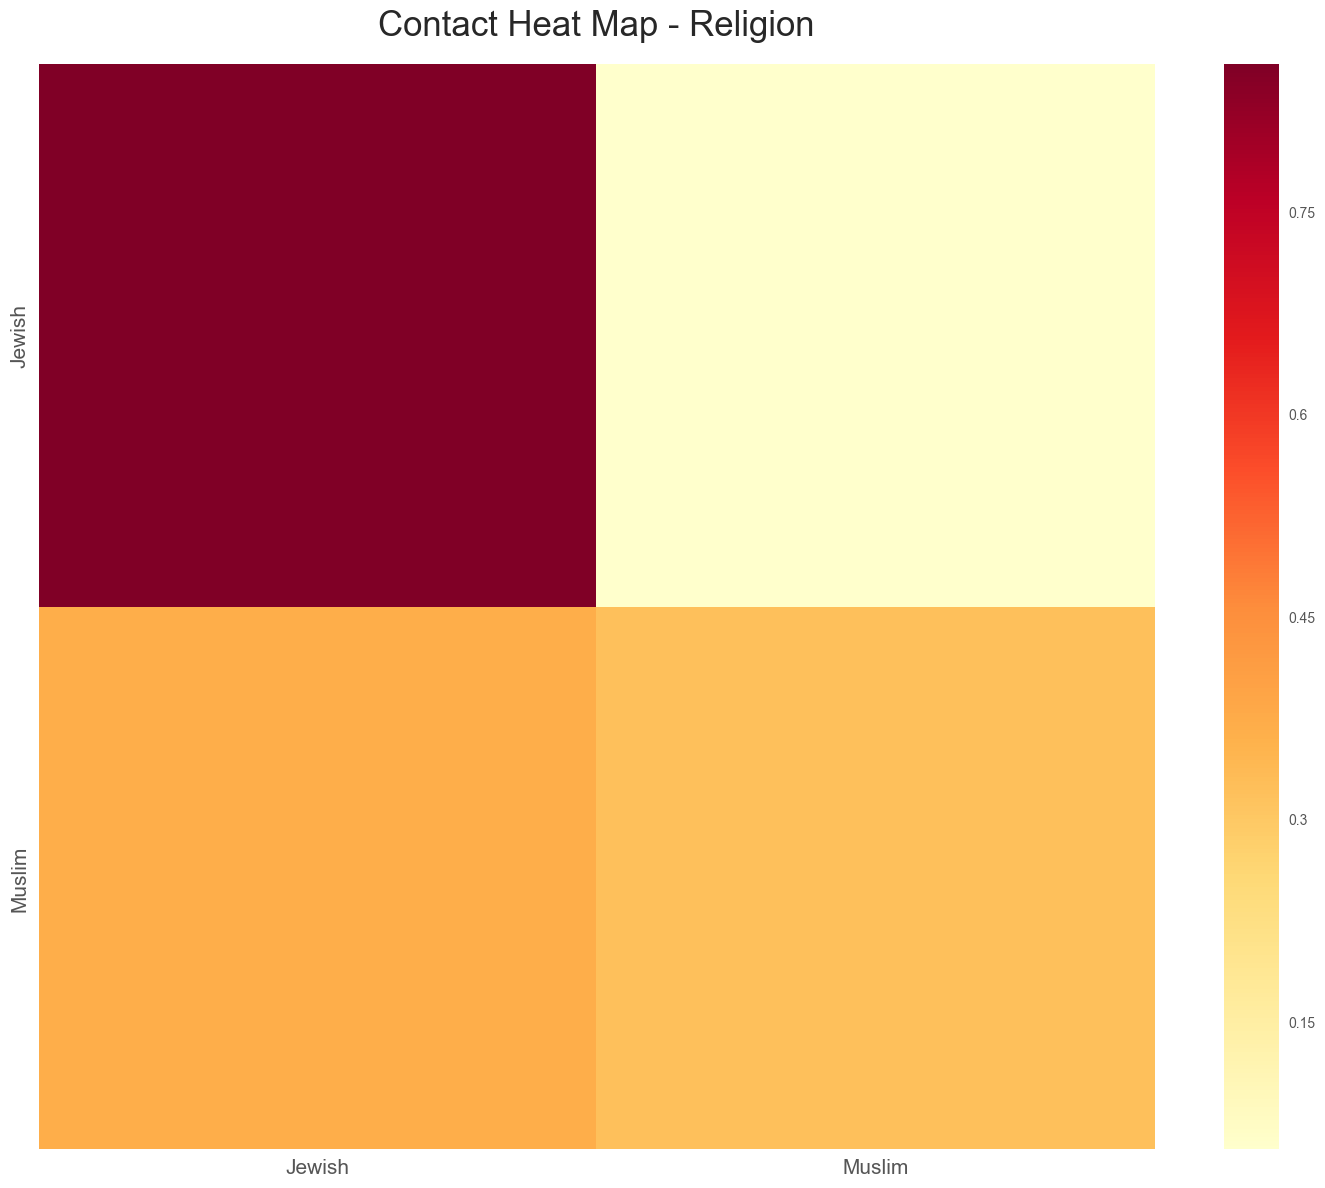

In [32]:
fig, ax = plt.subplots(figsize=(18,14))
ax.set_title("Contact Heat Map - Religion", {'fontsize': 25, 'position': (0.5,1.02)})
heat = sns.heatmap(contat_mat_religion, ax=ax, cmap='YlOrRd', robust = True)
ax.tick_params(labelsize=15)

# Color bar
cb = fig.axes[1]
ticks = np.array([0.15,0.30,0.45,0.60,0.75]) 
cb.set_yticklabels(ticks)

# plt.savefig('../img/contact_heatmap_religion_sample1+2.png', bbox_inches="tight")
plt.show()

# Religion with Orthodox Contact Matrix

#### Aggregate the columns

In [33]:
rels_with_ort = religion_with_orthodox.columns[:-1]
# Get only relevant areas in matrix A (only area with religion data)
matrix_A_df_rel = matrix_A_df.loc[religion_with_orthodox.index.values][religion_with_orthodox.index.values].copy()

In [34]:
rel_agg_cols_df = pd.DataFrame(index=matrix_A_df_rel.index, columns=rels_with_ort)
for rel in rels_with_ort:
    rel_agg_cols_df[rel] = matrix_A_df_rel.multiply(religion_with_orthodox[rel], axis='columns').sum(axis=1)

#### Aggregate the rows

In [35]:
rel_agg_df = pd.DataFrame(index=rels_with_ort, columns=rels_with_ort)
for rel in rels_with_ort:
    rel_agg_df.loc[rel] = rel_agg_cols_df.multiply(religion_with_orthodox[rel], axis='rows').sum()

In [36]:
rel_agg_df

,Jewish Orthodox,Jewish Non-Orthodox,Muslim,Christian,Druze,Other
Jewish Orthodox,168.6,183.116,4.00156,0,0,0
Jewish Non-Orthodox,192.056,2652.35,53.2525,0,0,0
Muslim,2.57879,36.6808,131.034,0,0,0
Christian,0,0,0,0,0,0
Druze,0,0,0,0,0,0
Other,0,0,0,0,0,0


In [37]:
contat_mat_rel = vists_to_contact_matrix(rel_agg_df.values, 'religion_with_orthodox')

Number of areas without population data (not home stat area): 0
Number of areas without population data (home stat area): 0



In [38]:
contat_mat_rel

,Jewish Orthodox,Jewish Non-Orthodox,Muslim
Jewish Orthodox,0.134864,0.416340,0.016176
Jewish Non-Orthodox,0.051755,0.717012,0.027170
Muslim,0.012121,0.169599,0.554450


In [39]:

contat_mat_rel_norm = contat_mat_rel.values.copy() 
for i in range(contat_mat_rel_norm.shape[0]):
    if contat_mat_rel_norm[i].sum() > 0:
        contat_mat_rel_norm[i] = contat_mat_rel_norm[i] / (contat_mat_rel_norm[i].sum())
        
contat_mat_rel_norm = pd.DataFrame(contat_mat_rel_norm, index=contat_mat_rel.index, columns=contat_mat_rel.columns)
contat_mat_rel_norm

,Jewish Orthodox,Jewish Non-Orthodox,Muslim
Jewish Orthodox,0.237696,0.733794,0.028510
Jewish Non-Orthodox,0.065024,0.900840,0.034136
Muslim,0.016466,0.230380,0.753154


In [40]:
# Save the final matrix
# contat_mat_edu.to_csv('../data/matrix/sample1+2_final_matrix_religion_with_orthodox.csv')        

## Religion with Orthodox Contact Matrix - Creating Heatmap

In [41]:
contat_mat_rel_log_df = contat_mat_rel_norm.applymap(lambda x: np.log(10*x))

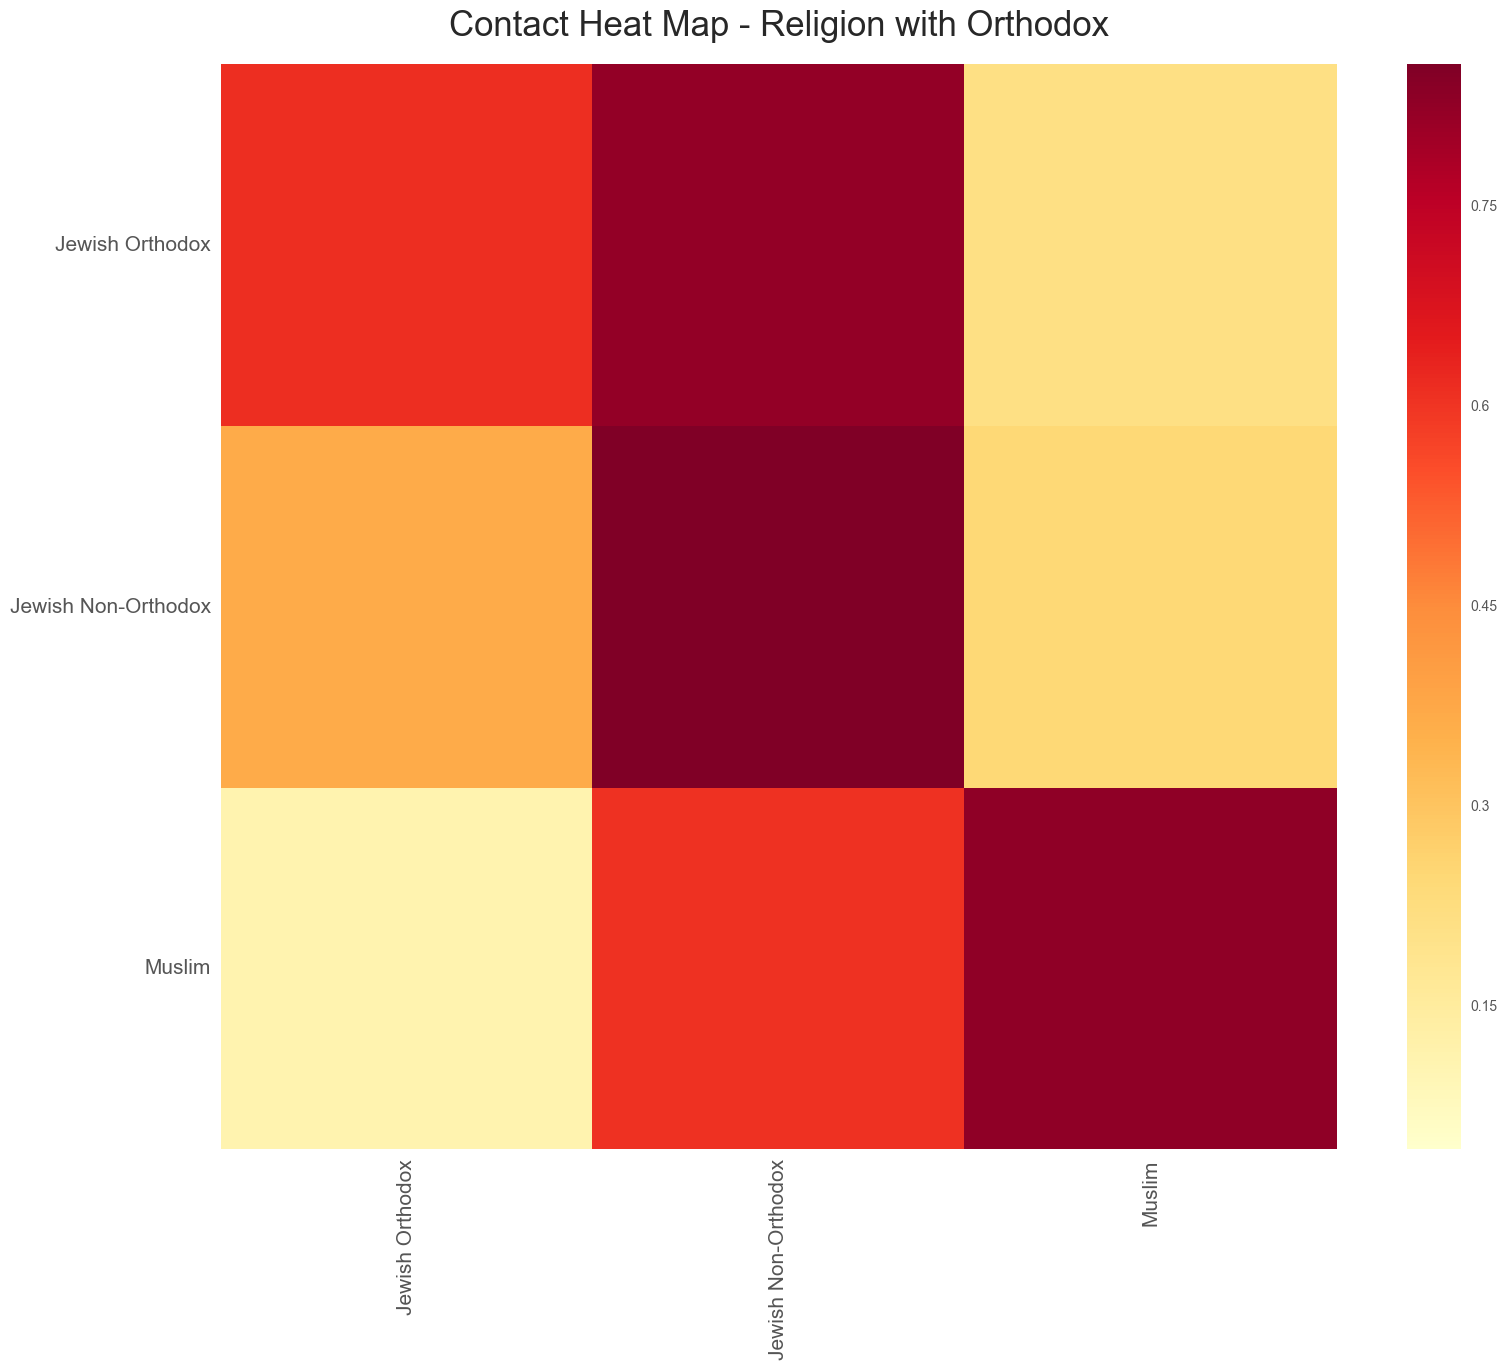

In [42]:
fig, ax = plt.subplots(figsize=(18,14))
ax.set_title("Contact Heat Map - Religion with Orthodox", {'fontsize': 25, 'position': (0.5,1.02)})
heat = sns.heatmap(contat_mat_rel_log_df, ax=ax, cmap='YlOrRd', robust = True)
ax.tick_params(labelsize=15)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')


# Color bar
cb = fig.axes[1]
ticks = np.array([0.15,0.30,0.45,0.60,0.75]) 
cb.set_yticklabels(ticks)

# plt.savefig('../img/contact_heatmap_religion_with_orthodox_sample1+2.png', bbox_inches="tight")
plt.show()

# Education

In [43]:
edu_levels = education.columns[:-1]

In [44]:
pop_d = {col: ((education[col]*education.pop_thou).sum()*1000) for col in edu_levels}

In [45]:
pop_d

{'Acadm1Cert_pcnt': 918694.2999999998,
 'Acadm2Cert_pcnt': 548456.3999999999,
 'MatricCert_pcnt': 1481125.9999999986,
 'OtherCertA_pcnt': 1715830.599999998,
 'PostSecondaryCert_pcnt': 802108.7999999999,
 'SecondaryCert_pcnt': 1089027.9999999995}

In [46]:
sum(pop_d.values())

6555244.099999996

#### Aggregate the columns

In [47]:
edu_levels = education.columns[:-1]
# Get only relevant areas in matrix A (only area with education data)
matrix_A_df_edu = matrix_A_df.loc[education.index.values][education.index.values].copy()

In [48]:
edu_agg_cols_df = pd.DataFrame(index=matrix_A_df_edu.index, columns=edu_levels)

for ed_lvl in edu_levels:
    edu_agg_cols_df[ed_lvl] = matrix_A_df_edu.multiply(education[ed_lvl], axis='columns').sum(axis=1)

#### Aggregate the rows

In [49]:
edu_agg_df = pd.DataFrame(index=edu_levels, columns=edu_levels)
for ed_lvl in edu_levels:
    edu_agg_df.loc[ed_lvl] = edu_agg_cols_df.multiply(education[ed_lvl], axis='rows').sum()

In [50]:
edu_agg_df

,SecondaryCert_pcnt,MatricCert_pcnt,PostSecondaryCert_pcnt,Acadm1Cert_pcnt,Acadm2Cert_pcnt,OtherCertA_pcnt
SecondaryCert_pcnt,162.507,206.895,97.9315,141.402,84.4485,194.054
MatricCert_pcnt,206.994,339.654,145.575,256.736,156.853,265.722
PostSecondaryCert_pcnt,99.0855,146.89,78.9442,113.561,69.4034,131.335
Acadm1Cert_pcnt,141.315,256.595,112.544,228.272,138.363,180.595
Acadm2Cert_pcnt,84.3855,156.94,68.8423,138.434,90.3318,107.916
OtherCertA_pcnt,192.835,262.905,128.846,178.742,106.763,281.398


In [51]:
contat_mat_edu = vists_to_contact_matrix(edu_agg_df.values, 'education')

Number of areas without population data (not home stat area): 0
Number of areas without population data (home stat area): 0



In [52]:
contat_mat_edu

,SecondaryCert_pcnt,MatricCert_pcnt,PostSecondaryCert_pcnt,Acadm1Cert_pcnt,Acadm2Cert_pcnt,OtherCertA_pcnt
SecondaryCert_pcnt,0.030873,0.040757,0.021800,0.024831,0.014744,0.049346
MatricCert_pcnt,0.030163,0.041173,0.021749,0.025701,0.015316,0.048034
PostSecondaryCert_pcnt,0.030091,0.040565,0.021642,0.025151,0.014972,0.048142
Acadm1Cert_pcnt,0.029379,0.041084,0.021552,0.026204,0.015655,0.046552
Acadm2Cert_pcnt,0.029197,0.040981,0.021474,0.026205,0.015677,0.046229
OtherCertA_pcnt,0.031011,0.040794,0.021917,0.024735,0.014676,0.050116


In [53]:
# Save the final matrix
contat_mat_edu.to_csv('../data/matrix/sample1+2_final_matrix_education.csv')        

## Education Contact Matrix - Creating Heatmap

In [54]:
contat_mat_edu_log_df = contat_mat_edu.applymap(lambda x: np.log(25*x))

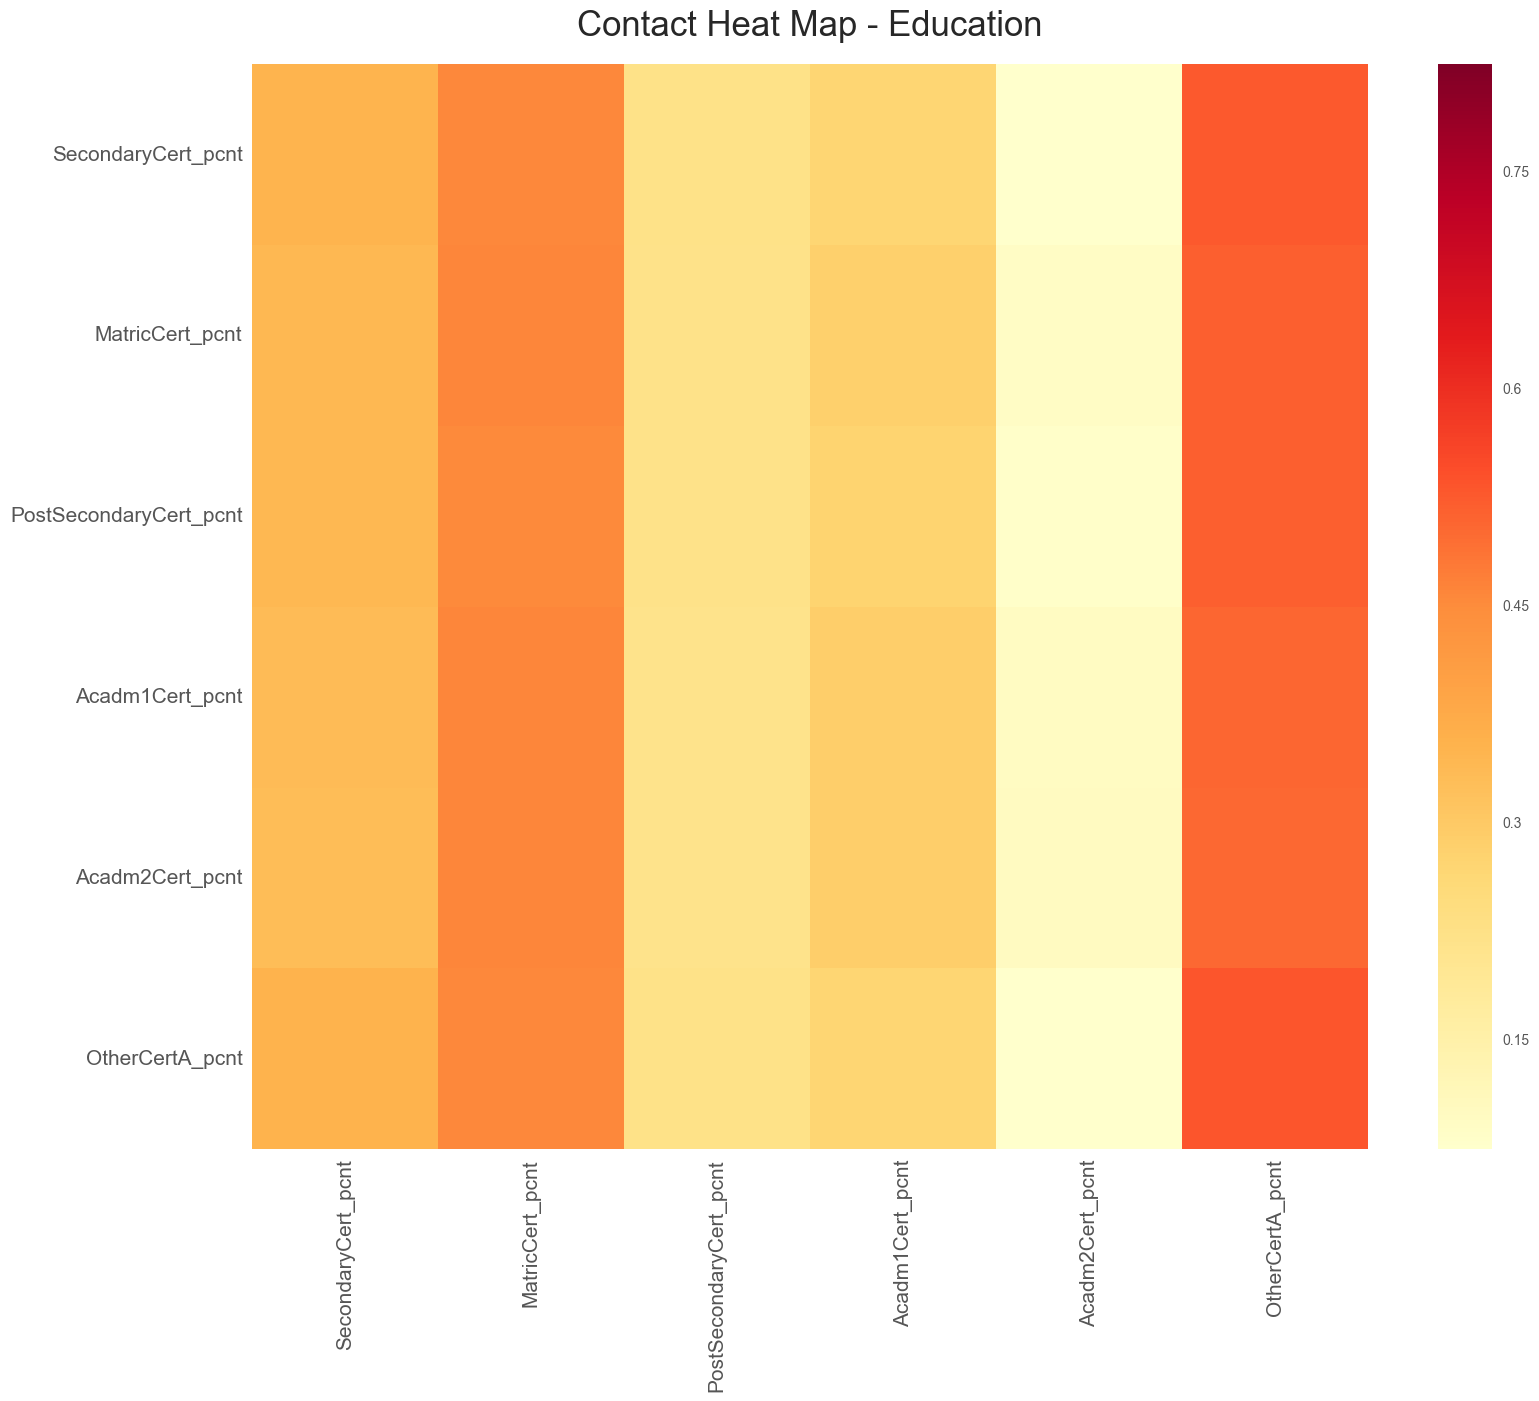

In [55]:
fig, ax = plt.subplots(figsize=(18,14))
ax.set_title("Contact Heat Map - Education", {'fontsize': 25, 'position': (0.5,1.02)})
heat = sns.heatmap(contat_mat_edu_log_df, ax=ax, cmap='YlOrRd', robust = True)
ax.tick_params(labelsize=15)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')


# Color bar
cb = fig.axes[1]
ticks = np.array([0.15,0.30,0.45,0.60,0.75]) 
cb.set_yticklabels(ticks)

# plt.savefig('../img/contact_heatmap_education_sample1+2.png', bbox_inches="tight")
plt.show()

In [56]:
contat_mat_edu_norm = contat_mat_edu.values.copy() 
for i in range(contat_mat_edu_norm.shape[0]):
    if contat_mat_edu_norm[i].sum() > 0:
        contat_mat_edu_norm[i] = contat_mat_edu_norm[i] / (contat_mat_edu_norm[i].sum())
        
contat_mat_edu_norm = pd.DataFrame(contat_mat_edu_norm, index=contat_mat_edu.index, columns=contat_mat_edu.columns)

In [57]:
contat_mat_edu_norm

,SecondaryCert_pcnt,MatricCert_pcnt,PostSecondaryCert_pcnt,Acadm1Cert_pcnt,Acadm2Cert_pcnt,OtherCertA_pcnt
SecondaryCert_pcnt,0.169304,0.223510,0.119551,0.136173,0.080854,0.270608
MatricCert_pcnt,0.165605,0.226057,0.119410,0.141111,0.084090,0.263726
PostSecondaryCert_pcnt,0.166649,0.224659,0.119859,0.139293,0.082920,0.266620
Acadm1Cert_pcnt,0.162829,0.227707,0.119450,0.145233,0.086769,0.258012
Acadm2Cert_pcnt,0.162418,0.227974,0.119456,0.145777,0.087207,0.257168
OtherCertA_pcnt,0.169228,0.222614,0.119603,0.134978,0.080089,0.273488


In [58]:
mat_pop = pd.DataFrame(index=contat_mat_edu.index, columns=contat_mat_edu.columns)
for col in mat_pop.columns:
    mat_pop[col] = pop_d[col] / sum(pop_d.values())

mat_pop

,SecondaryCert_pcnt,MatricCert_pcnt,PostSecondaryCert_pcnt,Acadm1Cert_pcnt,Acadm2Cert_pcnt,OtherCertA_pcnt
SecondaryCert_pcnt,0.166131,0.225945,0.122361,0.140146,0.083667,0.261749
MatricCert_pcnt,0.166131,0.225945,0.122361,0.140146,0.083667,0.261749
PostSecondaryCert_pcnt,0.166131,0.225945,0.122361,0.140146,0.083667,0.261749
Acadm1Cert_pcnt,0.166131,0.225945,0.122361,0.140146,0.083667,0.261749
Acadm2Cert_pcnt,0.166131,0.225945,0.122361,0.140146,0.083667,0.261749
OtherCertA_pcnt,0.166131,0.225945,0.122361,0.140146,0.083667,0.261749


In [59]:
devided_mat = pd.DataFrame(contat_mat_edu_norm / mat_pop, index=contat_mat_edu.index, columns=contat_mat_edu.columns)
devided_mat

,SecondaryCert_pcnt,MatricCert_pcnt,PostSecondaryCert_pcnt,Acadm1Cert_pcnt,Acadm2Cert_pcnt,OtherCertA_pcnt
SecondaryCert_pcnt,1.019103,0.989222,0.977028,0.971648,0.966377,1.033845
MatricCert_pcnt,0.996837,1.000495,0.975877,1.006884,1.005063,1.007552
PostSecondaryCert_pcnt,1.003117,0.994308,0.979549,0.993913,0.991070,1.018609
Acadm1Cert_pcnt,0.980126,1.007798,0.976205,1.036292,1.037080,0.985722
Acadm2Cert_pcnt,0.977650,1.008980,0.976254,1.040175,1.042316,0.982498
OtherCertA_pcnt,1.018641,0.985257,0.977458,0.963119,0.957238,1.044848


In [60]:
pop_d

{'Acadm1Cert_pcnt': 918694.2999999998,
 'Acadm2Cert_pcnt': 548456.3999999999,
 'MatricCert_pcnt': 1481125.9999999986,
 'OtherCertA_pcnt': 1715830.599999998,
 'PostSecondaryCert_pcnt': 802108.7999999999,
 'SecondaryCert_pcnt': 1089027.9999999995}

In [61]:
education.head()

,SecondaryCert_pcnt,MatricCert_pcnt,PostSecondaryCert_pcnt,Acadm1Cert_pcnt,Acadm2Cert_pcnt,OtherCertA_pcnt,pop_thou
stat_id,,,,,,,
261,0.090,0.306,0.181,0.202,0.063,0.157,2.6
281,0.138,0.234,0.116,0.194,0.141,0.177,8.9
311,0.203,0.245,0.152,0.118,0.045,0.237,4.4
312,0.252,0.197,0.121,0.058,0.021,0.351,3.1
313,0.253,0.236,0.126,0.040,0.014,0.331,3.3


In [62]:
education.describe()

,SecondaryCert_pcnt,MatricCert_pcnt,PostSecondaryCert_pcnt,Acadm1Cert_pcnt,Acadm2Cert_pcnt,OtherCertA_pcnt,pop_thou
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,0.166818,0.231590,0.122621,0.146170,0.090090,0.242718,3.795599
std,0.084948,0.071135,0.058810,0.081491,0.067764,0.141299,6.530312
min,0.006000,0.002000,0.002000,0.003000,0.000000,0.016000,0.600000
25%,0.107000,0.196000,0.083000,0.084000,0.032000,0.136500,2.600000
50%,0.158000,0.235000,0.114000,0.130000,0.081000,0.202000,3.500000
75%,0.211000,0.270000,0.157000,0.196000,0.125000,0.317000,4.400000
max,0.630000,0.702000,0.390000,0.425000,0.378000,0.818000,267.000000
